<a href="https://colab.research.google.com/github/raju-sharma/Operating-System/blob/main/OS_Job_Schedular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from matplotlib import pyplot as plt
import heapq

## these lists will store the data for plotting
core_plot = []
memory_plot = []

## stores the utilized memory and cpu
core_utilization = []
memory_utilization = []

## intialization
current_cpu = 0
current_mem = 0
current_hour = 0
current_day = 0

## 128 Worker nodes will be stored in this list
worker_nodes = []

## jobs scheduled in the queue
queue = []

jobs_dictionary = {}

### Stores daily memory utilization for plotting.
for n in range(9):
        core_plot.append([])
        memory_plot.append([])
        core_utilization.append(0)
        memory_utilization.append(0)
        worker_nodes.append([])
        queue.append([])

for n in range(9):
    for i in range(128):
        new_node = {'free_cores': 24, 'free_memory': 64, 'tasks': [] }
        worker_nodes[n].append(new_node)

## this function will calculate the Best Fit
def bestFit(jobid, n):
    job = list(jobs_dictionary[jobid][:])
    best = 64 + 1
    workerNode = None

    for node in worker_nodes[n]:
        if node['free_memory'] >= job[2] and node['free_cores'] >= job[3]:
            rem_size = node['free_memory'] - job[2]
            if rem_size <= best:
                best = rem_size
                workerNode = node

    if workerNode is None:
        return False
    else:
        workerNode['tasks'].append( [job[-1], job[-3], job[-2]] )
        workerNode['free_cores'] -= job[3]
        workerNode['free_memory'] -= job[2]
        return True

## This function will calculate the First fit
def firstFit(jobid, n):
    job = list(jobs_dictionary[jobid][:])
    for node in worker_nodes[n]:
        if node['free_memory'] >= job[2] and node['free_cores'] >= job[3]:
            node['tasks'].append( [job[-1], job[-3], job[-2]] )
            node['free_cores'] -= job[3]
            node['free_memory'] -= job[2]
            return True
    return False

## This function will calculate the Worst Fit
def worstFit(jobid, policy):
    job = list(jobs_dictionary[jobid][:])
    worst = -1
    worstNode = None

    for node in worker_nodes[policy]:
        if node['free_memory'] >= job[2] and node['free_cores'] >= job[3]:
            rem_size = node['free_memory'] - job[2]
            if rem_size >= worst:
                worst = rem_size
                worstNode = node

    if worstNode is None:
        return False
    else:
        worstNode['tasks'].append( [job[-1], job[-3], job[-2]] )
        worstNode['free_cores'] -= job[3]
        worstNode['free_memory'] -= job[2]
        return True

## Daily Update
def daily_update():
    for n in range(9):
        core_plot[n].append(core_utilization[n])
        memory_plot[n].append(memory_utilization[n])
        core_utilization[n] = 0
        memory_utilization[n] = 0

## Every Hour Updation
def every_hour_update():
    for n in range(9):
        for node in worker_nodes[n]:
            for job in node['tasks'][:]:
                job[0] -= 1
                if job[0] == 0:
                    node['free_cores'] += job[2]
                    node['free_memory'] += job[1]
                    node['tasks'].remove(job)

    for n in range(9):
        list1 = []
        while len(queue[n]) != 0:
            flag = False
            var = heapq.heappop(queue[n])
            if n > 3:
                jobid = var[1]
            else:
                jobid = var[0]

            if n == 1 or n == 4 or n == 7:
                flag = bestFit(jobid, n)
            elif n == 0 or n == 3 or n == 6:
                flag = firstFit(jobid, n)
            else:
                flag = worstFit(jobid, n)

            if not flag:
                list1.append(var)

        queue[n] = list1[:]
        heapq.heapify(queue[n])

        core_usgage = 0
        memory_usgage = 0

        for node in worker_nodes[n]:
            core_usgage += 24 - node['free_cores']
            memory_usgage += 64 - node['free_memory']

        core_usgage *= 100
        memory_usgage *= 100
        core_usgage /= (128 * 24 * 24)
        memory_usgage /= (128 * 64 * 24)
        core_utilization[n] += core_usgage
        memory_utilization[n] += memory_usgage


In [21]:
###############################################
## reading the JobArrival.txt file.
with open('JobArrival.txt','r') as f:
    for line in f:
        line = line.split()
        try:
            jobid, day, hr, mem, cpu, exe = int(line[1]), int(line[4]), int(line[7]), int(line[9]), int(
                line[11]), int(line[13])
            jobs_dictionary[jobid] = (day, hr, mem, cpu, exe)
        except IndexError:
            continue

    for job, values in jobs_dictionary.items():
        jobid, day, hr, mem, cpu, exe = job, values[0], values[1], values[2], values[3], values[4]
        if hr != current_hour:
            hr_diff = hr - current_hour
            if day != current_day:
                hr_diff += 24

            for _ in range(hr_diff):
                every_hour_update()
            current_hour = hr

        if day != current_day:
            daily_update()
            current_day = day

        ## Assignning the jobs to Wroker Nodes.
        for n in range(9):
            if n < 3:
                heapq.heappush(queue[n], (jobid,))
            elif n < 6:
                gross_value = exe * mem * cpu
                heapq.heappush(queue[n], (gross_value, jobid))
            else:
                heapq.heappush(queue[n], (exe, jobid))

daily_update()
every_hour_update()


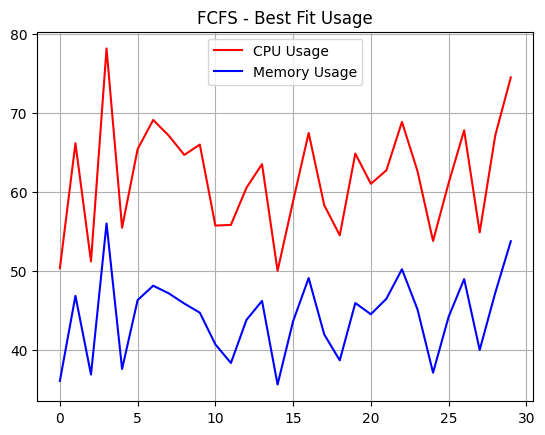

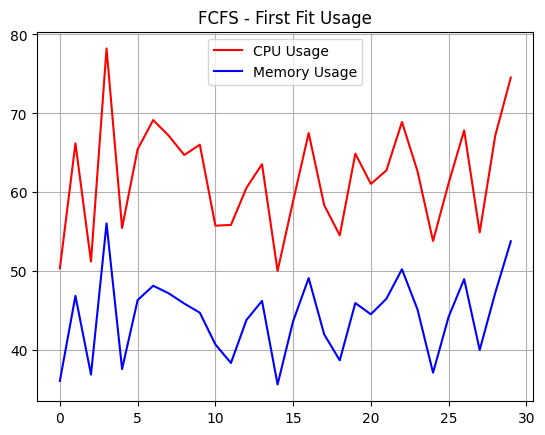

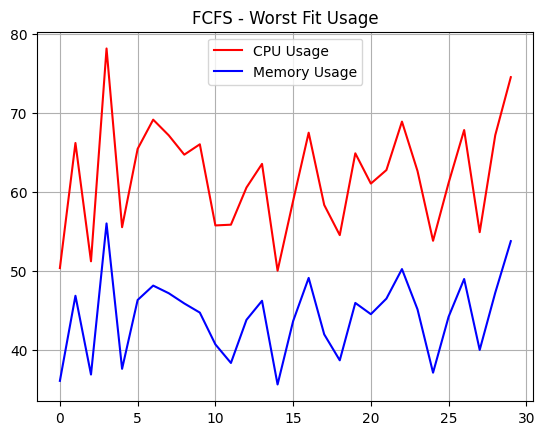

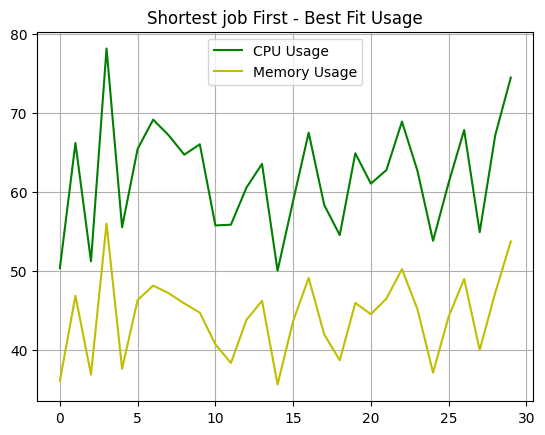

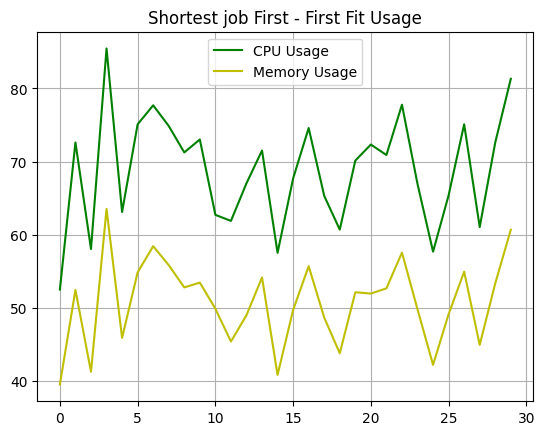

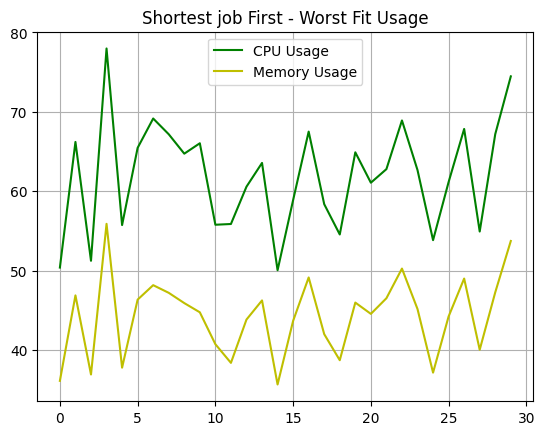

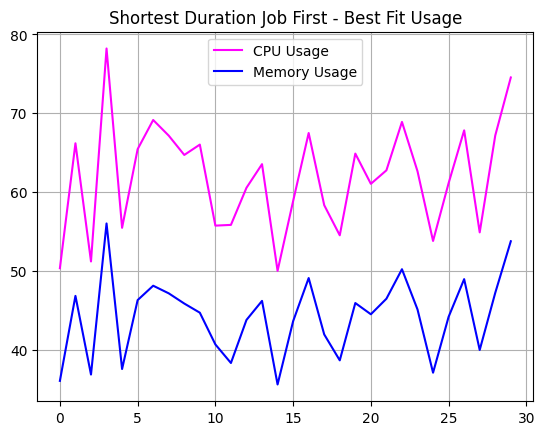

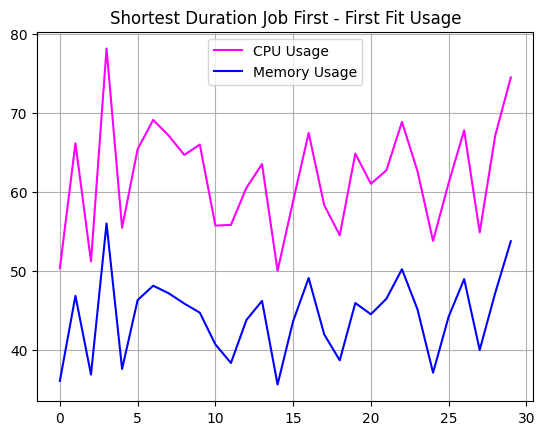

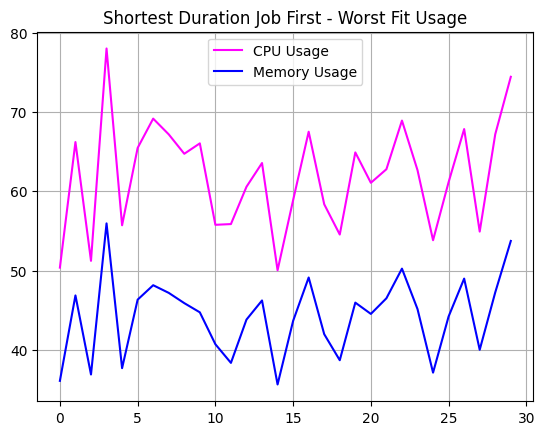

In [22]:
################## Scheduling Plots ######################

## FCFS
plt.plot(core_plot[1], 'r', label='CPU Usage')
plt.plot(memory_plot[1], 'b',label='Memory Usage')
plt.title("FCFS - Best Fit Usage")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(core_plot[0], 'r', label='CPU Usage')
plt.plot(memory_plot[0], 'b',label='Memory Usage')
plt.title("FCFS - First Fit Usage")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(core_plot[2], 'r', label='CPU Usage')
plt.plot(memory_plot[2], 'b',label='Memory Usage')
plt.title("FCFS - Worst Fit Usage")
plt.legend()
plt.grid(True)
plt.show()

## Shortest Job First
plt.plot(core_plot[4], 'g', label='CPU Usage')
plt.plot(memory_plot[4], 'y',label='Memory Usage')
plt.title("Shortest job First - Best Fit Usage")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(core_plot[3], 'g', label='CPU Usage')
plt.plot(memory_plot[3], 'y',label='Memory Usage')
plt.title("Shortest job First - First Fit Usage")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(core_plot[5], 'g', label='CPU Usage')
plt.plot(memory_plot[5], 'y',label='Memory Usage')
plt.title("Shortest job First - Worst Fit Usage")
plt.legend()
plt.grid(True)
plt.show()

## Shortest Duration Job First
plt.plot(core_plot[7], 'magenta', label='CPU Usage')
plt.plot(memory_plot[7], 'b',label='Memory Usage')
plt.title("Shortest Duration Job First - Best Fit Usage")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(core_plot[6], 'magenta', label='CPU Usage')
plt.plot(memory_plot[6], 'b',label='Memory Usage')
plt.title("Shortest Duration Job First - First Fit Usage")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(core_plot[8], 'magenta', label='CPU Usage')
plt.plot(memory_plot[8], 'b',label='Memory Usage')
plt.title("Shortest Duration Job First - Worst Fit Usage")
plt.legend()
plt.grid(True)
plt.show()
